# TMDB movie data
(cleaned from original data on [Kaggle's home page](https://www.kaggle.com))

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.(https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub)

IMPORTING LIBRARIES

In [1]:
# importing required packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import plotly as px

In [2]:
# Upgrading pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.1

Requirement already up-to-date: pandas==0.25.1 in /opt/conda/lib/python3.6/site-packages (0.25.1)


EXPLORING TMDB DATASET

In [3]:
# Loading my dataset.
movie_data = pd.read_csv('tmdb-movies.csv')

In [4]:
#checking for total rows and columns in the datasets
movie_data.shape

(10866, 21)

In [5]:
#summary statistics
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

from the above we can tell that the following columns have missing values: imbd_id, cast, homepage, director, tagline, overview, genres, production_companies.

In [7]:
movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
#what are the data types of each columns
movie_data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

id column dataypes is int which should'nt be since we wont be using for any mathematical expression.

In [9]:
movie_data.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [10]:
#checking for duplicates
sum(movie_data.duplicated())

1

In [11]:
#checking the percentage of missing value in each column
missing_value = movie_data.isnull().sum()*100/len(movie_data)
missing_value

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

DATA CLEANING

In [12]:
#droping irrelevant column for this analysis
movie_data = movie_data.drop(columns = ['production_companies','homepage','tagline','budget_adj','revenue_adj','imdb_id','overview','release_date'])

In [13]:
#dropping rows with missing values
movie_data.dropna(axis=0, inplace=True)
movie_data.shape

(9307, 13)

In [14]:
#changing the datatype for the id column
movie_data['id'] = movie_data['id'].astype(str)

In [15]:
#dropping duplicates
movie_data.drop_duplicates(inplace=True)

In [16]:
#defining a function to seperate data in genres and cast into multiple value source
def seperate_values(col):
    new_columns=(movie_data[col].str.split('|', expand=True).rename(columns=lambda x: f"{col}_{x+1}"))
    return new_columns

In [17]:
#separating cast column
movie_cast = seperate_values('cast')

In [18]:
#seperating the genres column
movie_genres = seperate_values('genres')

In [19]:
#replacing the new genres column with the previous
movie_data['genres'] = movie_genres

In [20]:
#replacing the new cast column with the previous
movie_data['cast'] = movie_cast

In [21]:
#getting the cleaned data information
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9306 entries, 0 to 10865
Data columns (total 13 columns):
id                9306 non-null object
popularity        9306 non-null float64
budget            9306 non-null int64
revenue           9306 non-null int64
original_title    9306 non-null object
cast              9306 non-null object
director          9306 non-null object
keywords          9306 non-null object
runtime           9306 non-null int64
genres            9306 non-null object
vote_count        9306 non-null int64
vote_average      9306 non-null float64
release_year      9306 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 1017.8+ KB


In [22]:
#getting the decriptve statistics for all the columns
movie_data.describe(include='all')

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,vote_count,vote_average,release_year
count,9306,9306.000000,9.306000e+03,9.306000e+03,9306,9306,9306,9306,9306.000000,9306,9306.000000,9306.000000,9306.000000
unique,9306,NaN,NaN,NaN,9060,3696,4294,8748,NaN,20,NaN,NaN,NaN
top,13339,NaN,NaN,NaN,Hamlet,Nicolas Cage,Woody Allen,woman director,NaN,Drama,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,4,48,43,132,NaN,2135,NaN,NaN,NaN
mean,NaN,0.707981,1.655383e+07,4.590105e+07,NaN,NaN,NaN,NaN,103.414249,NaN,247.627767,6.000355,2000.419514
std,NaN,1.063334,3.268917e+07,1.250529e+08,NaN,NaN,NaN,NaN,28.376247,NaN,616.013851,0.909980,13.068678
min,NaN,0.000188,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,0.000000,NaN,10.000000,1.500000,1960.000000
25%,NaN,0.230966,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,91.000000,NaN,19.000000,5.400000,1993.000000
50%,NaN,0.422673,3.500000e+05,0.000000e+00,NaN,NaN,NaN,NaN,100.000000,NaN,47.000000,6.100000,2005.000000
75%,NaN,0.790917,2.000000e+07,3.378094e+07,NaN,NaN,NaN,NaN,113.000000,NaN,181.000000,6.600000,2011.000000


In [23]:
# rows and columns of the new data
movie_data.shape

(9306, 13)

In [24]:
movie_data.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,car race|speed|revenge|suspense|car,137,Action,2947,7.3,2015


For the data wrangling phase:
* I dropped columns because colums such as tagline, homepage have a very high percentage of missing value about 26% and 73% respectively while the others are not needed while answering questions.
* I also dropped all null values in the dataset because data types of the colums with missing values is neither string or float therefore finding the average for each column to replace the missing values for each column is not possible. 
* Dropped the duplicate row in the dataset to avoid baises and also changed the the id column data type from int64 to string because it is a categorical variable. i further
* Seperated data in genres and cast into multiple value source

# QUESTIONS

Which genres are most popular from year to year?
What genre came up most as the most popular from year to year?
What is the most popular genre based on number movie?
What kinds of properties are associated with movies that have high revenues?


# DATA ANALYSIS

### Which genres are most popular from year to year?

In [25]:
#USING GROUPBY TO GET THE MOST POPULAR GENRE FOR EACH YEAR
top_genre=movie_data.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1).reset_index(level=0,drop=True)
#CALLING THE PANDAS SERIES
top_genre

release_year  genres         
1960          Drama              0.687575
1961          Adventure          1.394596
1962          Adventure          1.283631
1963          Animation          2.180410
1964          Adventure          0.736431
1965          Adventure          1.121328
1966          Animation          1.227582
1967          Family             2.550704
1968          Science Fiction    2.088194
1969          History            1.357317
1970          Animation          1.936962
1971          Family             2.430667
1972          Drama              1.495163
1973          Adventure          1.549139
1974          Romance            0.738153
1975          Drama              1.044668
1976          Crime              2.582657
1977          Adventure          3.762110
1978          Music              1.697618
1979          Horror             1.021005
1980          Music              1.607219
1981          Adventure          1.359776
1982          Science Fiction    1.685049
1983

### What genre came up most as the most popular from year to year?

In [26]:
#CHANGING THE PANDA SERIES TO DATAFRAME
top_genre = top_genre.reset_index()
top_genre.head()

,release_year,genres,popularity
0,1960,Drama,0.687575
1,1961,Adventure,1.394596
2,1962,Adventure,1.283631
3,1963,Animation,2.180410
4,1964,Adventure,0.736431


In [27]:
top_genre.genres.value_counts()

Adventure          18
Animation           8
Science Fiction     7
Family              4
Romance             4
Drama               3
Fantasy             3
Music               3
Horror              1
Crime               1
History             1
Thriller            1
Western             1
Mystery             1
Name: genres, dtype: int64

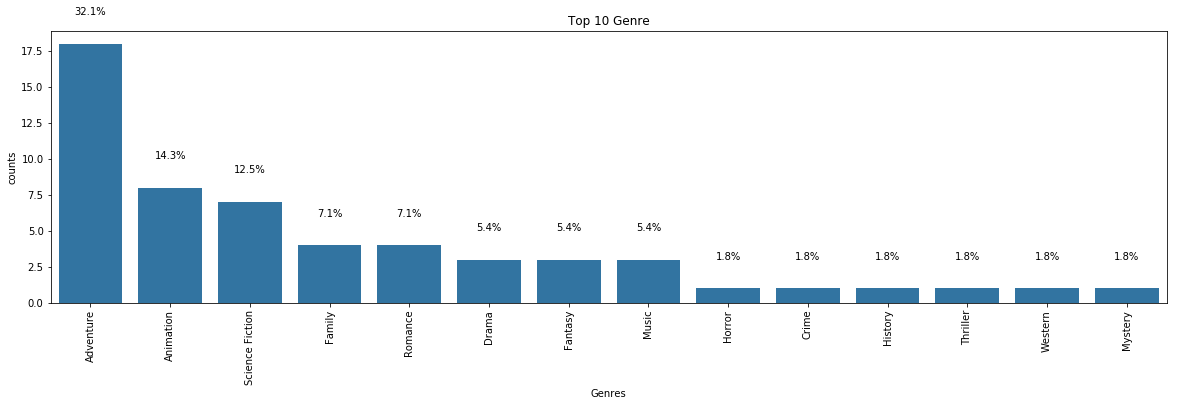

In [28]:
plt.figure(figsize = [20, 5]) 
n_df = top_genre['genres'].value_counts().sum()
genre_counts = top_genre['genres'].value_counts()
# Return the highest frequency in the `LoanStatus` column
max_genre_counts = genre_counts[0]
mycol = sns.color_palette()[0]
type_order = top_genre['genres'].value_counts().index
sns.countplot(data = top_genre, x = 'genres',order=type_order, color = mycol)
# Recalculating the type_counts just to have clarity.
genre_counts = top_genre['genres'].value_counts()
# get the current tick locations and labels
locs, labels = plt.xticks(rotation = 90)
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = genre_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_df)
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
plt.ylabel('counts')
plt.xlabel('Genres')
plt.title('Top 10 Genre');

## conclusion
adventure came up has the most popular genre from year to year most of of the based on popularity.

### What is the most popular genre based on number movie?

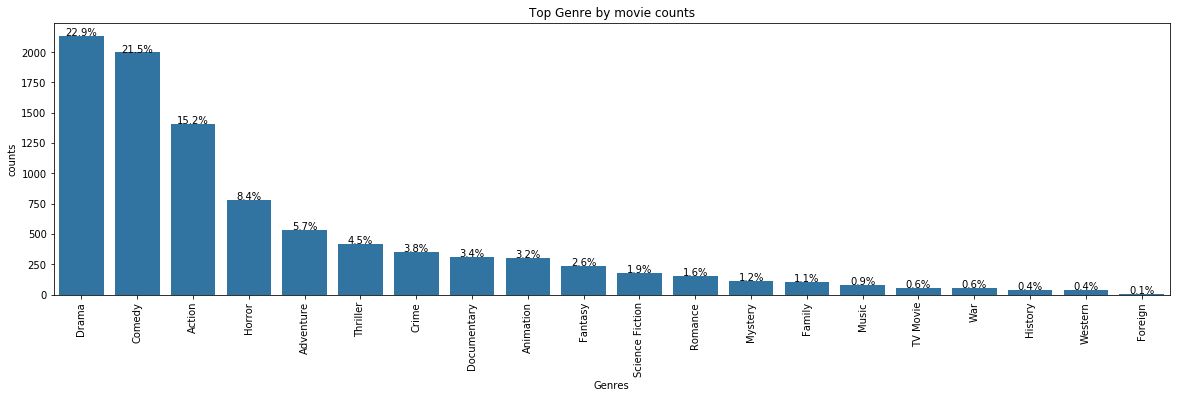

In [29]:
plt.figure(figsize = [20, 5]) 
n_df = movie_data['genres'].value_counts().sum()
movie_counts = movie_data['genres'].value_counts()
# Return the highest frequency in the `LoanStatus` column
max_movie_counts = genre_counts[0]
mycol = sns.color_palette()[0]
type_order = movie_data['genres'].value_counts().index
sns.countplot(data = movie_data, x = 'genres', color = mycol, order=type_order)
# Recalculating the type_counts just to have clarity.
movie_counts = movie_data['genres'].value_counts()
# get the current tick locations and labels
locs, labels = plt.xticks(rotation = 90)
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = movie_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_df)
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
plt.ylabel('counts')
plt.xlabel('Genres')
plt.title('Top Genre by movie counts');

## CONCLUSION
based on the number of movies drama genre happens to be the most popular genre.

### What kinds of properties are associated with movies that have high revenues?

In [30]:
#creating the profit column
movie_data['profit'] = movie_data['revenue'] - movie_data['budget']

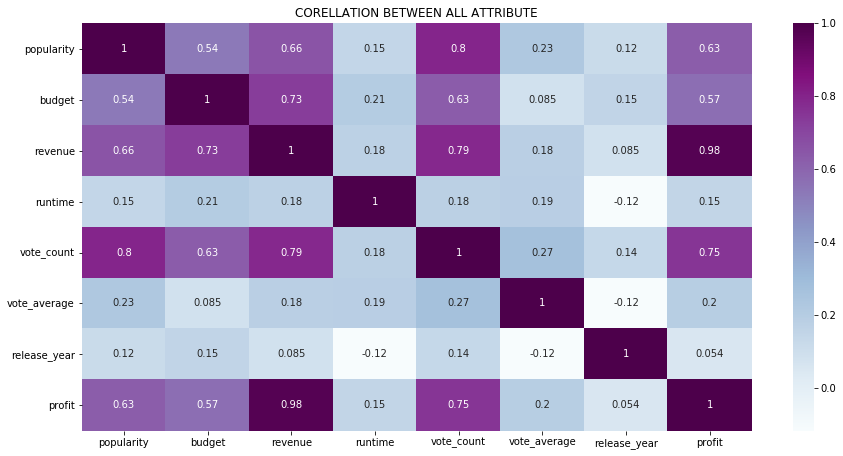

In [31]:
# checking for corellation between attribute using heat map
plt.figure(figsize=(15, 7.5))
plt.title('CORELLATION BETWEEN ALL ATTRIBUTE')
tmdb_corr=movie_data.corr()
sns.heatmap(tmdb_corr,cmap='BuPu', annot=True)
tmdb_corr;

## conclusion
from the heatmap we can tell that Profit has a signification relationship with popularity, budget, runtime and vote count, while vote_count has a signifinicant relationship with popularity, budget, revenue and profit,also revenue has a correlation with popularity, budget, Vote_count and profit, furthermore budget has a correlation with popularity, revenue, vote_count & profit, similarly popularity has a relationship with vote_count, revenue & budget.Runtime has a very low relationship with all the attributes. the darker the colour the higher the relationships.

Text(0.5,1,'Relationship between Budget and Revenue')

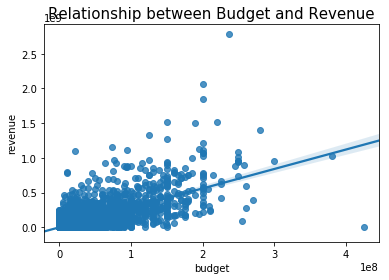

In [32]:
#plotting the scatter plot of budget and revenue
sns.regplot(x=movie_data["budget"], y=movie_data["revenue"]).set_title("Relationship between Budget and Revenue", size=15)

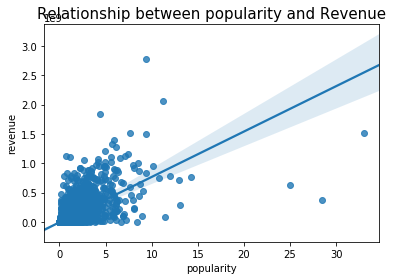

In [33]:
#plotting the scatter plot of popularity and revenue
sns.regplot(x=movie_data["popularity"], y=movie_data["revenue"]).set_title("Relationship between popularity and Revenue", size=15);

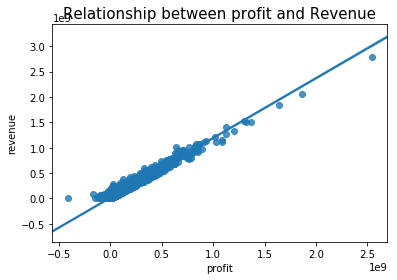

In [34]:
#plotting the scatter plot of profit and revenue
sns.regplot(x=movie_data["profit"], y=movie_data["revenue"]).set_title("Relationship between profit and Revenue", size=15);

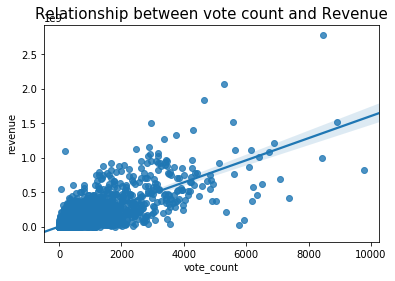

In [35]:
#plotting the scatter plot of vote count and revenue
sns.regplot(x=movie_data["vote_count"], y=movie_data["revenue"]).set_title("Relationship between vote count and Revenue", size=15);

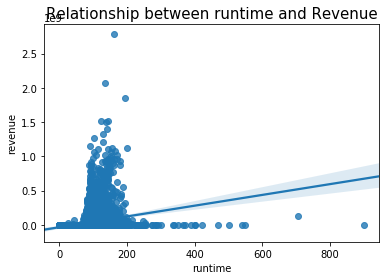

In [36]:
#plotting the scatter plot of profit and revenue
sns.regplot(x=movie_data["runtime"], y=movie_data["revenue"]).set_title("Relationship between runtime and Revenue", size=15);

## conclusion
from the above scatter plots we can deduce that:
* movies with higher revenue comes with higher runtime, higher budget and also come with a compensations higher popularity, higher profit, and higher vote counts.
* we can say also advise production companies should be willing to invest into movies with higher budget because the helps the producers  produce a high quality movie that then return a high profit.

# Limitations

The genres column has more than one genres in each row which made it difficult to explore to draw insights from the column.
Budget and Revenue Column has no currency unit.
incorrect data types
lot of missing values  
Duplicates gives biased result


In [37]:
from subprocess import call
call(['python','-m','nbconvert','Investigate_a_Dataset.ipynb'])

0